In [54]:
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver
from matplotlib import pyplot as plt
%matplotlib inline
import re
import os,sys, shutil
import time
from datetime import date
try:
    import cPickle as pickle
except:
    import pickle
import pprint
from collections import deque
from shutil import copyfile
import random
import glob
# Import the required modules
import cv2, os
import numpy as np
from PIL import Image
from sklearn.cross_validation import KFold
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import math
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

In [4]:
pkl_fl = open("linkedin_profiles.pickle","rb")
my_original_list=pickle.load(pkl_fl) # errors out here
pkl_fl.close()

In [ ]:
directory = "Male"
    
if os.path.exists(directory):
    shutil.rmtree(directory)
    os.makedirs(directory)     
else:
    os.makedirs(directory) 

directory1 = "Female"

if os.path.exists(directory1):
    shutil.rmtree(directory1)
    os.makedirs(directory1)     
else:
    os.makedirs(directory1)     

directory2 = "Label_Images_Age"

if os.path.exists(directory2):
    shutil.rmtree(directory2)
    os.makedirs(directory2)     
else:
    os.makedirs(directory2)     
    
fileList = glob.glob("./Images/*.*")

for id,fp in enumerate(fileList):
    filename, file_extension = os.path.splitext(fp)
    uid = filename.split('/')[-1]
    #print fp
    for prof in my_original_list:
        if prof['User_ID'] == uid:
            prof_age = prof['age']
            
            if (0 <= prof_age <= 30):
                new_file_extension = 'Youth'
            else:
                new_file_extension = 'Senior'
            
            copyfile(filename + ".jpg", './Label_Images_Age/'+ uid + '.' + str(id) + "." + new_file_extension +'.jpg')

In [5]:
# For face detection we will use the Haar Cascade provided by OpenCV.
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

# For face recognition we will the the LBPH Face Recognizer 
recognizer = cv2.createLBPHFaceRecognizer()

In [7]:
def get_images_and_labels(path):
    # Append all the absolute image paths in a list image_paths
    
    image_paths = [os.path.join(path, f) for f in os.listdir(path)]
    # images will contains face images
    images = []
    # labels will contains the label that is assigned to the image
    labels = []
    #gender will contains 1 or 0 indecating male or female
    age =[]
    
    for image_path in image_paths:
        # Read the image and convert to grayscale
        try:
            image_pil = Image.open(image_path).convert('L')
            # Convert the image format into numpy array
            image = np.array(image_pil, 'uint8')
            # Get the label of the image
        except:
            pass
        
        nbr = int(os.path.split(image_path)[1].split(".")[1])
        age_current = os.path.split(image_path)[1].split(".")[2]
        print nbr
        
        # Detect the face in the image
        faces = faceCascade.detectMultiScale(image)
        # If face is detected, append the face to images and the label to labels
        try:
            for (x, y, w, h) in faces:

                ref_image = image[y: y + h, x: x + w]
                resized = cv2.resize(ref_image, (100, 100), interpolation = cv2.INTER_AREA)
                #edge_images = cv2.Canny(resized,100,200)
                
                images.append(np.array(resized))   #resized.reshape(1,10000)
                labels.append(nbr)

                if age_current == 'Youth':
                    age.append(0)
                
                else:
                    age.append(1)
                
                #face_file_name = "faces/face_" + str(y) + ".jpg"
                #cv2.imwrite(face_file_name, sub_face)
                
                cv2.imshow("Adding faces to traning set...", resized)
                cv2.waitKey(1)
        except:
            pass
    # return the images list and labels list
    print "lables"
    print labels
    print "Age_current"
    print age
    
    return images, labels, age

In [8]:
images, labels, ageList = get_images_and_labels('Label_Images_Age')

cv2.destroyAllWindows()

1023
151
2801
1864
1183
1687
260
1922
1745
2045
2411
3274
83
1912
1024
2653
2954
3187
2717
938
296
1131
3063
3403
1525
1498
1458
804
516
450
1246
2758
3282
2423
3316
1722
1930
2835
2263
2431
2602
433
1790
482
3250
2910
2354
2325
1094
2446
3027
2128
3016
412
427
1882
1874
2604
709
4
2903
3389
1985
3339
3340
345
664
140
2439
1940
277
3424
673
1358
1962
512
3373
2388
3400
3032
2657
2028
1433
1213
1771
2387
2929
2540
3057
2157
2748
844
834
2789
2867
2168
2249
541
2067
53
2991
2137
2526
1574
880
2995
1396
2236
2412
1816
2460
704
1953
840
3112
953
1756
26
328
3308
2269
2545
1806
214
663
3370
43
1400
666
2480
2170
1852
2169
1505
2456
2352
364
1929
3053
1144
2880
2290
2516
2984
3017
538
676
1516
1724
1439
3056
2724
394
1450
660
3206
1758
680
2251
1744
1827
2590
3252
2827
1028
2727
2609
2030
977
3167
1329
838
2646
1014
3058
1964
2049
3009
1123
2227
1061
802
3182
796
100
2406
3285
337
1888
254
3205
1969
2109
643
659
2691
1609
951
705
1906
2264
609
274
2875
1611
1846
803
1022
2435
413
1455
2287
2

In [9]:
#res_images = []
res_age = []

for age in ageList:
    res_age.append(np.array(age))
                   
res_age = np.array(res_age)

In [10]:
res_age.shape

(2969,)

## Basic model parameters as external flags.

In [11]:
# Basic model parameters as external flags.
flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_float('learning_rate', 0.01, 'Initial learning rate.')
flags.DEFINE_integer('max_steps', 2000, 'Number of steps to run trainer.')
flags.DEFINE_integer('hidden1', 1500, 'Number of units in hidden layer 1.')
flags.DEFINE_integer('hidden2', 1000, 'Number of units in hidden layer 2.')
flags.DEFINE_integer('hidden3', 500, 'Number of units in hidden layer 3.')
flags.DEFINE_integer('batch_size', 100, 'Batch size.  '
                     'Must divide evenly into the dataset sizes.')
flags.DEFINE_string('train_dir', 'data', 'Directory to put the training data.')
flags.DEFINE_boolean('fake_data', False, 'If true, uses fake data '
                     'for unit testing.')


NUM_CLASSES = 2
IMAGE_SIZE = 100
#CHANNELS = 3
IMAGE_PIXELS = IMAGE_SIZE * IMAGE_SIZE

In [12]:
n_nodes = [IMAGE_PIXELS, 1500, 1000, 500, NUM_CLASSES]
n_epochs = 10
#NUM_CLASSES = 3

In [ ]:
# def inference(images, hidden1_units, hidden2_units):
#     # Hidden 1
#     with tf.name_scope('hidden1'):
#         weights = tf.Variable(
#             tf.truncated_normal([IMAGE_PIXELS, hidden1_units],
#                                 stddev=1.0 / math.sqrt(float(IMAGE_PIXELS))),
#             name='weights')
#         biases = tf.Variable(tf.zeros([hidden1_units]),
#                              name='biases')
#         hidden1 = tf.nn.relu(tf.matmul(images, weights) + biases)
#     # Hidden 2
#     with tf.name_scope('hidden2'):
#         weights = tf.Variable(
#             tf.truncated_normal([hidden1_units, hidden2_units],
#                                 stddev=1.0 / math.sqrt(float(hidden1_units))),
#             name='weights')
#         biases = tf00,.Variable(tf.zeros([hidden2_units]),
#                              name='biases')
#         hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)
#     # Linear
#     with tf.name_scope('softmax_linear'):
#         weights = tf.Variable(
#             tf.truncated_normal([hidden2_units, NUM_CLASSES],
#                                 stddev=1.0 / math.sqrt(float(hidden2_units))),
#             name='weights')
#         biases = tf.Variable(tf.zeros([NUM_CLASSES]),
#                              name='biases')
#         logits = tf.matmul(hidden2, weights) + biases
    
#     return logits

In [13]:
def neural_network_model(data):
    n_hidden_layers = 3
    # define the layers
    layers = [] 
    for i in range(n_hidden_layers + 1):
        layers.append( {'weights':tf.Variable(tf.random_normal([n_nodes[i], n_nodes[i+1]])), 
                        'biases':tf.Variable(tf.random_normal([n_nodes[i+1]]))} )
    
    # calculate the nodal values for each layer
    calcs = [data]
    for i in range(n_hidden_layers):
        calcs.append( tf.nn.relu(tf.matmul(calcs[i], layers[i]['weights']) + layers[i]['biases']) )

    #  return the last layer of nodes
    return tf.matmul(calcs[-1], layers[-1]['weights']) + layers[-1]['biases']

In [ ]:
# def cal_loss(logits, labels):
#     #labels = tf.to_int64(labels)
#     cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
#         logits, labels, name='xentropy')
#     loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')
  
#     return loss

In [ ]:
# def training(loss, learning_rate):
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#     global_step = tf.Variable(0, name='global_step', trainable=False)
#     train_op = optimizer.minimize(loss, global_step=global_step)
  
#     return train_op

In [14]:
def evaluation(logits, labels):
    correct = tf.nn.in_top_k(logits, labels, 1)
  
    return tf.reduce_sum(tf.cast(correct, tf.int32))

In [15]:
def placeholder_inputs():
    images_placeholder = tf.placeholder(tf.float32, [None,IMAGE_PIXELS])
    labels_placeholder = tf.placeholder(tf.float32, [None,NUM_CLASSES])
    
    return images_placeholder, labels_placeholder


def fill_feed_dict(images_feed,labels_feed, images_pl, labels_pl):
    feed_dict = {
      images_pl: images_feed,
      labels_pl: labels_feed,
    }
  
    return feed_dict

In [ ]:
# def do_eval(sess, eval_correct, images_placeholder, labels_placeholder, data_set):
#     # And run one epoch of eval.
#     true_count = 0  # Counts the number of correct predictions.
#     steps_per_epoch = 47 // FLAGS.batch_size
#     num_examples = steps_per_epoch * FLAGS.batch_size
#     for step in xrange(steps_per_epoch):
#         feed_dict = fill_feed_dict(train_images,train_labels,
#                                images_placeholder,
#                                labels_placeholder)
#         true_count += sess.run(eval_correct, feed_dict=feed_dict)
#     precision = true_count / num_examples
#     print('  Num examples: %d  Num correct: %d  Precision @ 1: %0.04f' %
#         (num_examples, true_count, precision))

In [16]:
def dense_to_one_hot(labels_dense, num_classes):
    """Convert class labels from scalars to one-hot vectors."""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

In [43]:
def main():
    # Tell TensorFlow that the model will be built into the default Graph.
    with tf.Graph().as_default():
        # Generate placeholders for the images and labels.
        images_placeholder, labels_placeholder = placeholder_inputs()
        
        
        logits = neural_network_model(images_placeholder)
        
        
        cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits,labels_placeholder) )
        training_acc = []
        testing_acc = []
       
        #print cost
        optimizer = tf.train.AdamOptimizer(1e-4).minimize(cost)

        with tf.Session() as sess:
            sess.run(tf.initialize_all_variables())
        
            subset_size = 128
            for step in xrange(1000):
                start_time = time.time()
                total_loss = 0
                for i in range(int(train_images.shape[0] / subset_size) ):
                    
                    epoch_x = train_images[i * subset_size:][:subset_size]
                    epoch_y = train_labels[i * subset_size:][:subset_size]
                    
                    feed_dict = fill_feed_dict(epoch_x, epoch_y, images_placeholder, labels_placeholder)
                    
                    _, loss_value = sess.run([optimizer, cost],
                                           feed_dict=feed_dict)
                    
                    total_loss+=loss_value
                    
                duration = time.time() - start_time
                #if step % 10 == 0:
                    #Print status to stdout.
                correct = tf.equal(tf.argmax(logits,1), tf.argmax(labels_placeholder,1))
                #print correct
                accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
                
                print('Step %d: loss = %.2f (%.3f sec)' % (step, total_loss, duration)),
                
                current_train_acc = accuracy.eval({images_placeholder: train_images, labels_placeholder: train_labels})
                current_test_acc = accuracy.eval({images_placeholder: test_images, labels_placeholder: test_labels})
                
                training_acc.append(current_train_acc)
                testing_acc.append(current_test_acc)
                
                
                print('Training Accuracy:', current_train_acc),
                print('Testing Accuracy:', current_test_acc)
    
    return training_acc, testing_acc

In [44]:
# Get the sets of images and labels for training, validation, and

images = np.array(images)
images = images.reshape(images.shape[0],IMAGE_PIXELS)

#label = res_gender
labels = dense_to_one_hot(res_age,2)

In [45]:
train_images = images[:-300]
train_labels = labels[:-300]
test_images = images[-300:]
test_labels = labels[-300:]

In [46]:
train_images.shape

(2669, 10000)

In [47]:
train_labels[:10]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [48]:
if __name__ == '__main__':
    train_acc, test_acc = main()

Step 0: loss = 395528670.00 (20.735 sec) ('Training Accuracy:', 0.58523792) ('Testing Accuracy:', 0.55666667)
Step 1: loss = 220396099.00 (18.116 sec) ('Training Accuracy:', 0.54589736) ('Testing Accuracy:', 0.54000002)
Step 2: loss = 179621873.00 (18.783 sec) ('Training Accuracy:', 0.57474709) ('Testing Accuracy:', 0.57333332)
Step 3: loss = 155101924.50 (18.809 sec) ('Training Accuracy:', 0.58673662) ('Testing Accuracy:', 0.56666666)
Step 4: loss = 134338255.50 (18.091 sec) ('Training Accuracy:', 0.6140877) ('Testing Accuracy:', 0.55666667)
Step 5: loss = 119382057.00 (18.524 sec) ('Training Accuracy:', 0.62233049) ('Testing Accuracy:', 0.56666666)
Step 6: loss = 109150841.00 (18.371 sec) ('Training Accuracy:', 0.6140877) ('Testing Accuracy:', 0.52999997)
Step 7: loss = 100355448.50 (18.288 sec) ('Training Accuracy:', 0.64368677) ('Testing Accuracy:', 0.55000001)
Step 8: loss = 90316874.00 (18.259 sec) ('Training Accuracy:', 0.65979767) ('Testing Accuracy:', 0.56333333)
Step 9: loss 

In [26]:
train_acc

[0.5517602,
 0.57685608,
 0.61275709,
 0.61519694,
 0.61903101,
 0.62704778,
 0.65597767,
 0.64168698,
 0.68455911,
 0.68246776,
 0.70303243,
 0.70965493,
 0.68978739,
 0.70826072,
 0.68978739,
 0.67828512,
 0.63715583,
 0.68734753,
 0.75182992,
 0.77030325,
 0.74695015,
 0.72638547,
 0.76158941,
 0.69083303,
 0.71627742,
 0.66050887,
 0.67096549,
 0.78459394,
 0.77866852,
 0.80411291,
 0.76158941,
 0.7535727,
 0.76298362,
 0.830603,
 0.81561518,
 0.84454513,
 0.69466716,
 0.6521436,
 0.79679328,
 0.86197281,
 0.86127573,
 0.79365635,
 0.66573721,
 0.75845242,
 0.85604739,
 0.87905192,
 0.82851166,
 0.70094109,
 0.74032766,
 0.72359705,
 0.84489369,
 0.87173229,
 0.88114327,
 0.68316489,
 0.62321365,
 0.86301845,
 0.85988152,
 0.71314049,
 0.78773093,
 0.77065182,
 0.67933077,
 0.62669921,
 0.66225165,
 0.84593934,
 0.8574416,
 0.68211919,
 0.61031717,
 0.7570582,
 0.81456953,
 0.64830953,
 0.59602648,
 0.68246776,
 0.7804113,
 0.59637505,
 0.58417565,
 0.67096549,
 0.61101431,
 0.6692

In [53]:
max(train_acc)

0.98051703

In [52]:
max(test_acc)

0.67000002

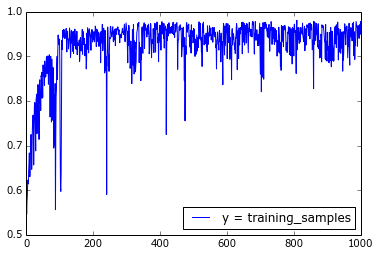

In [50]:
x = np.arange(1000)

plt.plot(x, train_acc)
#plt.plot(x, test_acc)


plt.legend(['y = training_samples', 'y = testing_samples'], loc='lower right')

plt.show()

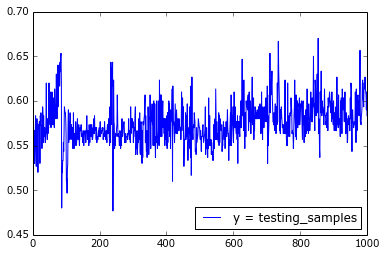

In [51]:
x = np.arange(1000)

plt.plot(x, test_acc)


plt.legend(['y = testing_samples'], loc='lower right')

plt.show()

In [55]:
accuracy_list = pd.DataFrame(
    {'Training_Acc': train_acc,
     'Testing_Acc': test_acc,
    })

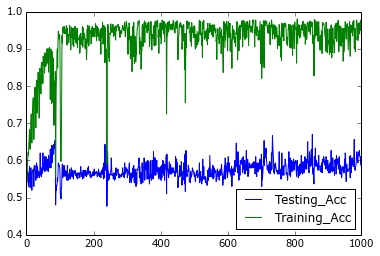

In [59]:
accuracy_list.plot()